In [4]:
import psi4
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' # to fix the omp running issue

from psi4.driver.procrouting.response.scf_response import tdscf_excitations 
from psi4.driver.p4util import spectrum

h2o2 = psi4.geometry("""0 1
O        0.000000    0.695000   -0.092486
O       -0.000000   -0.695000   -0.092486
H       -0.388142    0.895249    0.739888
H        0.388142   -0.895249    0.739888
symmetry c1
""", name="H2O2")

# what's this for?
psi4.set_options({
    'save_jk': True,
})

e, wfn = psi4.energy("b3lyp/cc-pvdz", return_wfn=True, molecule=h2o2)
res = tdscf_excitations(wfn, states=20)

ex_e = [r["EXCITATION ENERGY"] for r in res]

osc_str = [np.linalg.norm(r["OSCILLATOR STRENGTH (LEN)"])**2 for r in res]

uv_vis_spectrum = spectrum(poles=ex_e, residues=osc_str, gamma=0.01, out_units="nm")


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on Pigsy
*** at Wed Dec 11 10:55:35 2024

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry O          line   198 file /home/yzhang/App/anaconda3/envs/specai/share/psi4/basis/cc-pvdz.gbs 
    atoms 3-4 entry H          line    22 file /home/yzhang/App/anaconda3/envs/specai/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RKS Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------




*** tstop() called on Pigsy at Wed Dec 11 10:55:35 2024
Module time:
	user time   =       0.50 seconds =       0.01 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       5.83 seconds =       0.10 minutes
	system time =       0.22 seconds =       0.00 minutes
	total time  =        286 seconds =       4.77 minutes

******************************************************************************************
**********                               WARNING                                **********
**********       The names of excited state variables changed between 1.5       **********
**********     and 1.6. For a quick solution, remove the symmetry specifier     **********
**********   from the variable name. For full details, see 'Notes on Psivars'   **********
**********                        in the documentation.                         **********
*****************************************

In [3]:
print(res)

[{'EXCITATION ENERGY': np.float64(0.23166149449758225), 'ELECTRIC DIPOLE TRANSITION MOMENT (LEN)': array([-8.47800215e-12, -3.81219643e-12, -8.06732744e-03]), 'OSCILLATOR STRENGTH (LEN)': np.float64(1.0051293719766075e-05), 'ELECTRIC DIPOLE TRANSITION MOMENT (VEL)': array([ 6.94792036e-12,  8.95122317e-13, -8.99102234e-03]), 'OSCILLATOR STRENGTH (VEL)': np.float64(0.00023263392103644407), 'MAGNETIC DIPOLE TRANSITION MOMENT': array([ 8.90913051e-12, -4.29631378e-12, -3.12902525e-01]), 'ROTATORY STRENGTH (LEN)': np.float64(0.0025242871269674574), 'ROTATORY STRENGTH (VEL)': np.float64(-0.01214407080957091), 'SYMMETRY': 'A', 'SPIN': 'singlet', 'RIGHT EIGENVECTOR ALPHA': <psi4.core.Matrix object at 0x7302d87ec170>, 'LEFT EIGENVECTOR ALPHA': <psi4.core.Matrix object at 0x7302d87ef3b0>, 'RIGHT EIGENVECTOR BETA': <psi4.core.Matrix object at 0x7302d87ec170>, 'LEFT EIGENVECTOR BETA': <psi4.core.Matrix object at 0x7302d87ef3b0>}, {'EXCITATION ENERGY': np.float64(0.23526519688056421), 'ELECTRIC DI

In [6]:
print(uv_vis_spectrum)

{'convolution': {'x': array([ 22.23079578,  22.27150891,  22.31222204, ..., 225.67429616,
       225.71500929, 225.75572241]), 'y': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       8.14382412e-21, 7.54189325e-21, 6.98376906e-21])}, 'sticks': {'poles': array([196.68073289, 193.66805259, 147.69417283, 145.90528883,
       137.69763595, 111.28676795, 110.0239738 , 106.75484025,
       106.18796571, 102.21872967,  87.20767548,  85.61614581,
        78.43081897,  77.44351378,  64.34048034,  58.61766437,
        57.50658722,  52.28714604,  51.50652882,  51.3057853 ]), 'residues': array([1.32685379e-16, 9.43973462e-08, 6.66384711e-05, 1.29042351e-04,
       5.02103370e-03, 3.04271662e-01, 8.49629184e-14, 9.21233894e-06,
       5.04278566e-01, 2.05822508e+01, 1.45107559e-03, 9.57964942e-03,
       1.68997293e+02, 2.37262037e+03, 1.22601149e+02, 3.17197490e-02,
       7.82968552e-02, 1.86848942e+01, 1.64665409e-03, 3.60474926e-03])}}


In [18]:
# write the data file

datafile = "simu_data.dat"
 
# convert a.u. to nm
au2nm = 45.56335
ex_e = [au2nm * e for e in ex_e]

with open(datafile,"w") as DATA:
    for i in range(len(ex_e)):
        DATA.write('%-20f %-20f\n' %(ex_e[i],osc_str[i]))

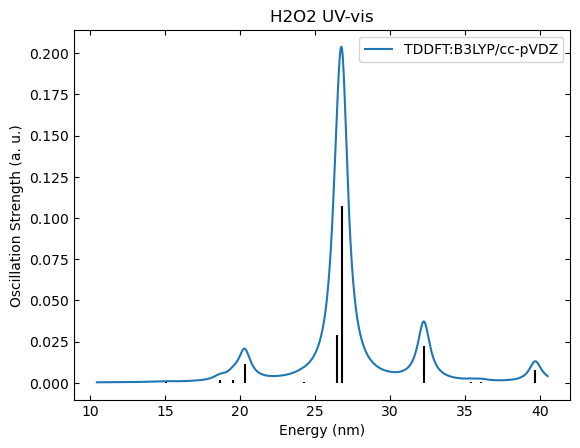

In [22]:
# import plot code
from importlib import reload # reload function, not necessary if the module is stable
import ConvolutionPlot # the module must be imported after the reload function
                       # must import the module, not the functions in the module!!!
reload(ConvolutionPlot) # reload the updated module
from ConvolutionPlot import * # import the functions


DELETE_DATA = False

ConvPlot_UVvis(gamma = 1.0, PlotTitle = "H2O2 UV-vis", PlotLabel = "TDDFT:B3LYP/cc-pVDZ",
              ScaleStick = 0.4)
             
if DELETE_DATA:
    os.remove(datafile)